In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon-reviews.csv to amazon-reviews (1).csv


In [ ]:
reviews= pd.read_csv('amazon-reviews.csv')

In [ ]:
reviews.head()

,asin,name,rating,date,verified,title,Review,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
reviews.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [ ]:
reviews.rename(columns={'body':'Review'},inplace=True)

In [ ]:
reviews.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'Review',
       'helpfulVotes'],
      dtype='object')

In [ ]:
reviews.drop('asin',axis=1, inplace=True)
reviews.head()

,name,rating,date,verified,title,Review,helpfulVotes
0,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
reviews.drop(['name'],inplace=True,axis=1)
reviews

,rating,date,verified,title,Review,helpfulVotes
0,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...
67981,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [ ]:
reviews.Review.describe()

count     67965
unique    59811
top        Good
freq        303
Name: Review, dtype: object

In [ ]:
txt_upd = ' '.join(reviews)

In [ ]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [ ]:
text_tokens = word_tokenize(txt_upd)

In [ ]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
text_tf = tf.fit_transform(tokens_without_sw)

In [ ]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [ ]:
df

,avg,char,count,date,hashtags,helpfulvotes,numerics,rating,review,title,upper,verified,word
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
word_list = ' '.join(df)

In [ ]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

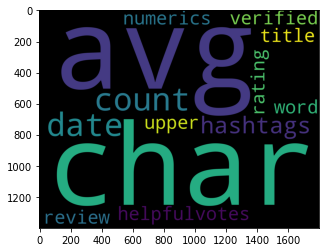

In [ ]:
plt.imshow(wordcloud)

NUMBER OF WORDS

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I had the Samsung A600 for awhile which is abs...,327
1,Due to a software issue between Nokia and Spri...,129
2,"This is a great, reliable phone. I also purcha...",131
3,"I love the phone and all, because I really did...",107
4,The phone has been great for every purpose it ...,128


NUMBER OF CHARACTERS

In [ ]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I had the Samsung A600 for awhile which is abs...,1688.0
1,Due to a software issue between Nokia and Spri...,748.0
2,"This is a great, reliable phone. I also purcha...",768.0
3,"I love the phone and all, because I really did...",524.0
4,The phone has been great for every purpose it ...,606.0


Avg word Length

In [ ]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I had the Samsung A600 for awhile which is abs...,4.165138
1,Due to a software issue between Nokia and Spri...,4.806202
2,"This is a great, reliable phone. I also purcha...",4.870229
3,"I love the phone and all, because I really did...",3.906542
4,The phone has been great for every purpose it ...,3.742188


Number of special characters

In [ ]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I had the Samsung A600 for awhile which is abs...,1
1,Due to a software issue between Nokia and Spri...,0
2,"This is a great, reliable phone. I also purcha...",0
3,"I love the phone and all, because I really did...",0
4,The phone has been great for every purpose it ...,0


Number of Numerics

In [ ]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I had the Samsung A600 for awhile which is abs...,1
1,Due to a software issue between Nokia and Spri...,0
2,"This is a great, reliable phone. I also purcha...",0
3,"I love the phone and all, because I really did...",0
4,The phone has been great for every purpose it ...,0


Number of Uppercase words

In [ ]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','upper']].head()

,Review,upper
0,I had the Samsung A600 for awhile which is abs...,1
1,Due to a software issue between Nokia and Spri...,0
2,"This is a great, reliable phone. I also purcha...",0
3,"I love the phone and all, because I really did...",0
4,The phone has been great for every purpose it ...,0


**Spelling correction**

We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I had the Samsung A600 for awhile which is abs...
1    Due to a software issue between Foka and Print...
2    His is a great, reliable phone. I also purchas...
3    I love the phone and all, because I really did...
4    The phone has been great for every purpose it ...
Name: Review, dtype: object

**Feature engineering**

In [ ]:
print(reviews['date'].str.split(' ').str[0],'\n',
      reviews['date'].str.split(' ').str[1],'\n',
      reviews['date'].str.split(' ').str[2])

0          October
1          January
2         December
3            March
4           August
           ...    
67981       August
67982    September
67983         July
67984     December
67985     December
Name: date, Length: 67986, dtype: object 
 0        11,
1         7,
2        30,
3        18,
4        28,
        ... 
67981    16,
67982    14,
67983    14,
67984    24,
67985    11,
Name: date, Length: 67986, dtype: object 
 0        2005
1        2004
2        2003
3        2004
4        2005
         ... 
67981    2019
67982    2019
67983    2019
67984    2019
67985    2019
Name: date, Length: 67986, dtype: object


In [ ]:
df=reviews.copy()
df['Date']=df['date'].str.split(' ').str[0]
df['Month']=df['date'].str.split(' ').str[1]
df['Year']=df['date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,October,"11,",2005
1,January,"7,",2004
2,December,"30,",2003
3,March,"18,",2004
4,August,"28,",2005
...,...,...,...
67981,August,"16,",2019
67982,September,"14,",2019
67983,July,"14,",2019
67984,December,"24,",2019


In [ ]:
df.Month.value_counts()

3,     2354
19,    2353
23,    2348
18,    2343
20,    2342
11,    2331
17,    2330
14,    2327
13,    2308
9,     2294
22,    2276
15,    2269
16,    2252
24,    2248
5,     2242
10,    2239
21,    2222
8,     2220
25,    2213
12,    2192
26,    2178
7,     2163
27,    2159
6,     2155
4,     2153
1,     2116
2,     2113
28,    2077
29,    1981
30,    1979
31,    1209
Name: Month, dtype: int64

change 'Month' from words to numbers

In [ ]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,"11,"
1,"7,"
2,"30,"
3,"18,"
4,"28,"
...,...
67981,"16,"
67982,"14,"
67983,"14,"
67984,"24,"


In [ ]:
df1.info

<bound method DataFrame.info of        rating                date  verified  \
0           3    October 11, 2005     False   
1           1     January 7, 2004     False   
2           5   December 30, 2003     False   
3           3      March 18, 2004     False   
4           4     August 28, 2005     False   
...       ...                 ...       ...   
67981       5     August 16, 2019     False   
67982       5  September 14, 2019     False   
67983       5       July 14, 2019     False   
67984       5   December 24, 2019      True   
67985       5   December 11, 2019     False   

                                                   title  \
0                            Def not best, but not worst   
1                            Text Messaging Doesn't Work   
2                                        Love This Phone   
3                                Love the Phone, BUT...!   
4           Great phone service and options, lousy case!   
...                                        

In [ ]:
df1[['Date','Year']]=df1[['Date','Year']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rating        67986 non-null  int64  
 1   date          67986 non-null  object 
 2   verified      67986 non-null  bool   
 3   title         67972 non-null  object 
 4   Review        67965 non-null  object 
 5   helpfulVotes  27215 non-null  float64
 6   word_count    67986 non-null  int64  
 7   char_count    67965 non-null  float64
 8   avg_word      67986 non-null  float64
 9   hashtags      67986 non-null  int64  
 10  numerics      67986 non-null  int64  
 11  upper         67986 non-null  int64  
 12  Date          67986 non-null  object 
 13  Month         67986 non-null  object 
 14  Year          67986 non-null  object 
dtypes: bool(1), float64(3), int64(5), object(6)
memory usage: 7.3+ MB


In [ ]:
df1.drop('date',axis=1, inplace=True)
df1.head()

,rating,verified,title,Review,helpfulVotes,word_count,char_count,avg_word,hashtags,numerics,upper,Date,Month,Year
0,3,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,327,1688.0,4.165138,1,1,1,October,"11,",2005
1,1,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,129,748.0,4.806202,0,0,0,January,"7,",2004
2,5,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,131,768.0,4.870229,0,0,0,December,"30,",2003
3,3,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,107,524.0,3.906542,0,0,0,March,"18,",2004
4,4,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,128,606.0,3.742188,0,0,0,August,"28,",2005


**Data visualization**

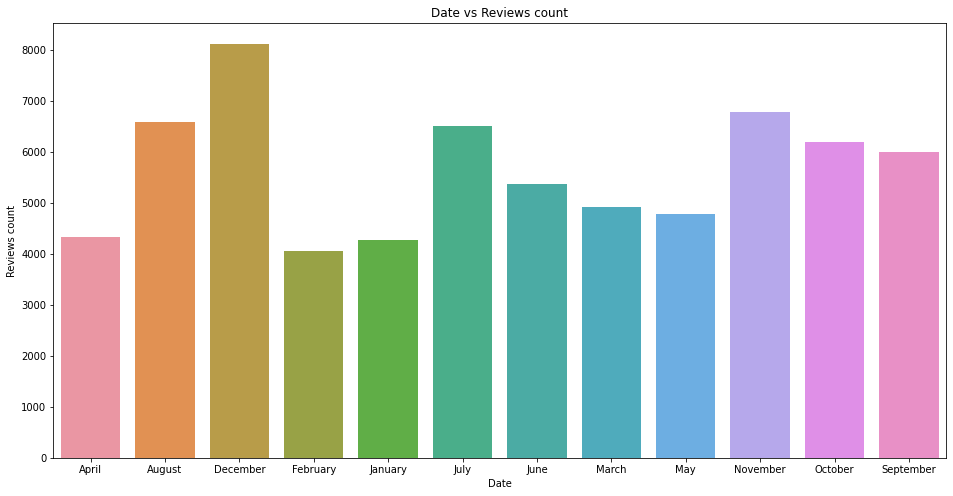

In [ ]:


#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

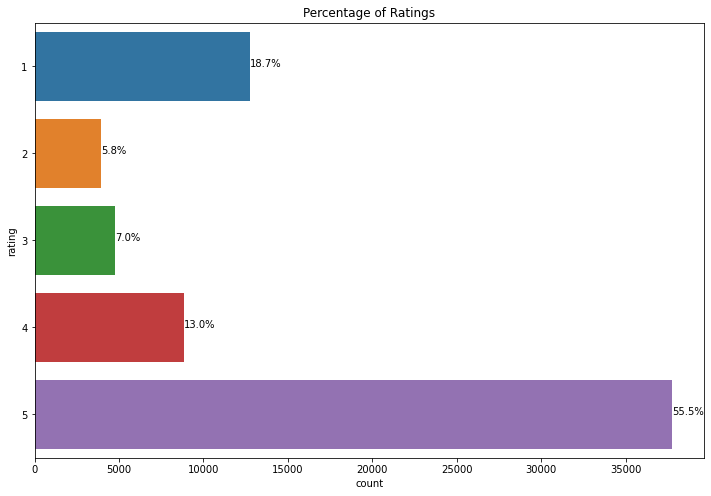

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

sentiment analysis

In [ ]:
data = reviews[['Review']]
data

,Review
0,I had the Samsung A600 for awhile which is abs...
1,Due to a software issue between Nokia and Spri...
2,"This is a great, reliable phone. I also purcha..."
3,"I love the phone and all, because I really did..."
4,The phone has been great for every purpose it ...
...,...
67981,I love the camera on this phone. The screen is...
67982,I've been an Xperia user for several years and...
67983,buy one more for my cousin
67984,Product looks and works like new. Very much re...


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['body'] = data['body'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [ ]:
data

,body
0,i samsung a600 awhile absolute doo doo. you re...
1,due software issue nokia sprint phone's text m...
2,"this great, reliable phone. i also purchased p..."
3,"i love phone all, i really need one, i expect ..."
4,"the phone great every purpose offers, except d..."
...,...
67981,"i love camera phone. the screen huge, 4k color..."
67982,i've xperia user several years i say sony come...
67983,buy one cousin
67984,product looks works like new. very much recomm...


**Postive text**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving positive-words.txt to positive-words.txt


In [ ]:
import codecs
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [ ]:
positive_words = pos[35:]

**Negetive text**

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving negative-words.txt to negative-words.txt


In [ ]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [ ]:
negative_words = neg[35:]

In [ ]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [ ]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [ ]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

**CONCLUSION**

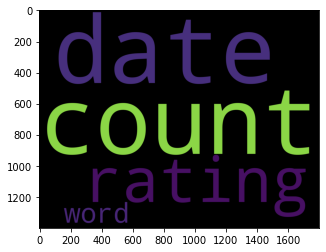

In [ ]:
plt.imshow(wordcloud_neg)

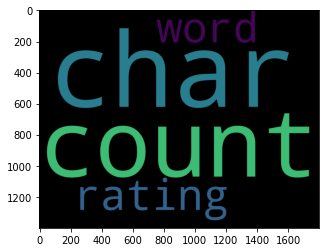

In [ ]:
plt.imshow(wordcloud_pos)